In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pyplot import figure

In [2]:
df = pd.read_csv('Food_Inspections.csv')
df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2553880,H & D FOOD MART,H & D FOOD MART,2840557.0,Grocery Store,Risk 3 (Low),2000 W DEVON AVE,CHICAGO,IL,60659.0,04/04/2022,License,Not Ready,NaN,41.998004,-87.680200,"(-87.68020042279053, 41.998003769952014)"
1,2553871,ANN SATHER'S CAFE,ANN SATHER'S CAFE,2172454.0,Restaurant,Risk 1 (High),3415 N BROADWAY,CHICAGO,IL,60657.0,04/04/2022,Canvass,Pass,43. IN-USE UTENSILS: PROPERLY STORED - Comment...,41.943810,-87.644951,"(-87.64495107447185, 41.94380970211237)"
2,519335,"DYNAMIC AFRICAN CUISINE, INC.",DYNAMIC AFRICAN CUISINE,2129336.0,Restaurant,Risk 1 (High),1127 W THORNDALE AVE,CHICAGO,IL,60660.0,12/05/2011,License,Pass,NaN,41.989926,-87.659359,"(-87.65935925694728, 41.98992607473702)"
3,2553860,CAJUN BOIL AND BAR CHICAGO,CAJUN BOIL & SHAKE,2835887.0,Restaurant,Risk 3 (Low),5500 S SHORE DR,CHICAGO,IL,60637.0,04/04/2022,License,Pass,NaN,41.795185,-87.580598,"(-87.58059777168157, 41.79518501605705)"
4,2553849,LOST LARSON,LOST LARSON,2839835.0,Restaurant,Risk 2 (Medium),2140 W DIVISION ST,CHICAGO,IL,60622.0,04/04/2022,License,Pass,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.903229,-87.681340,"(-87.68133976093554, 41.90322929302484)"


In [3]:
df.shape

(234319, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234319 entries, 0 to 234318
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Inspection ID    234319 non-null  int64  
 1   DBA Name         234319 non-null  object 
 2   AKA Name         231835 non-null  object 
 3   License #        234301 non-null  float64
 4   Facility Type    229347 non-null  object 
 5   Risk             234246 non-null  object 
 6   Address          234319 non-null  object 
 7   City             234146 non-null  object 
 8   State            234267 non-null  object 
 9   Zip              234258 non-null  float64
 10  Inspection Date  234319 non-null  object 
 11  Inspection Type  234318 non-null  object 
 12  Results          234319 non-null  object 
 13  Violations       171103 non-null  object 
 14  Latitude         233522 non-null  float64
 15  Longitude        233522 non-null  float64
 16  Location         233522 non-null  obje

#### Names of few columns need to be changed. This is to make the names more clear.         

In [5]:
df = df.rename(columns={'DBA Name': 'Trade Name', 'AKA Name': 'Another Name', 'License #':'License', 'Zip' : 'Zipcode' })

In [6]:
df.isnull().sum(axis = 0)

Inspection ID          0
Trade Name             0
Another Name        2484
License               18
Facility Type       4972
Risk                  73
Address                0
City                 173
State                 52
Zipcode               61
Inspection Date        0
Inspection Type        1
Results                0
Violations         63216
Latitude             797
Longitude            797
Location             797
dtype: int64

#### Another name can be dropped because Trade name already existed. There are so many null values in this column.

In [7]:
#dropping Another name column
df = df.drop(['Another Name'],axis=1)

In [8]:
df['State'].value_counts()

IL    234261
IN         3
CA         1
NY         1
WI         1
Name: State, dtype: int64

#### Neglisable count are not from IL. So State Column can be dropped.

In [9]:
#dropping State Column
df = df.drop(['State'], axis = 1)

In [10]:
df['City'].value_counts()

CHICAGO                233347
Chicago                   369
chicago                   118
CCHICAGO                   53
SCHAUMBURG                 27
                        ...  
LAKE ZURICH                 1
LANSING                     1
chicagoBEDFORD PARK         1
LOS ANGELES                 1
Maywood                     1
Name: City, Length: 74, dtype: int64

#### Almost all the data belongs to Chicago or around it. So it can be dropped because no needed information can be extracted from it.

In [11]:
#dropping City Column
df = df.drop(['City'], axis = 1)

In [12]:
#Splitting Inspection date into date, month and year.
df['Year'] = pd.DatetimeIndex(df['Inspection Date']).year
df['Month'] = pd.DatetimeIndex(df['Inspection Date']).month
df['Day'] = pd.DatetimeIndex(df['Inspection Date']).day

## Exploratory Data Analysis

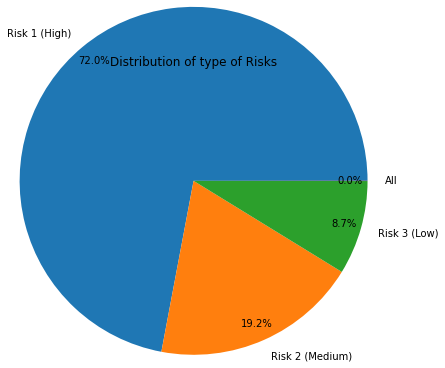

In [13]:
#Pie chart of types of risks
risk_count = df['Risk'].value_counts()
plt.pie(risk_count, labels = list(df['Risk'].value_counts().index),autopct='%1.1f%%',
          pctdistance=0.9, startangle=0, radius = 2)
plt.title('Distribution of type of Risks', fontdict={'fontsize': 12})
plt.show() 

##### Count of 'All' type risks is comparitively far less than the other. It is almost neglisable. High Risk is almost 3/4 th of whole Risk.

In [14]:
#dropping the rows with All type
df = df[~df.Risk.isin(["All"])]
df['Risk'].value_counts()

Risk 1 (High)      168740
Risk 2 (Medium)     44966
Risk 3 (Low)        20496
Name: Risk, dtype: int64

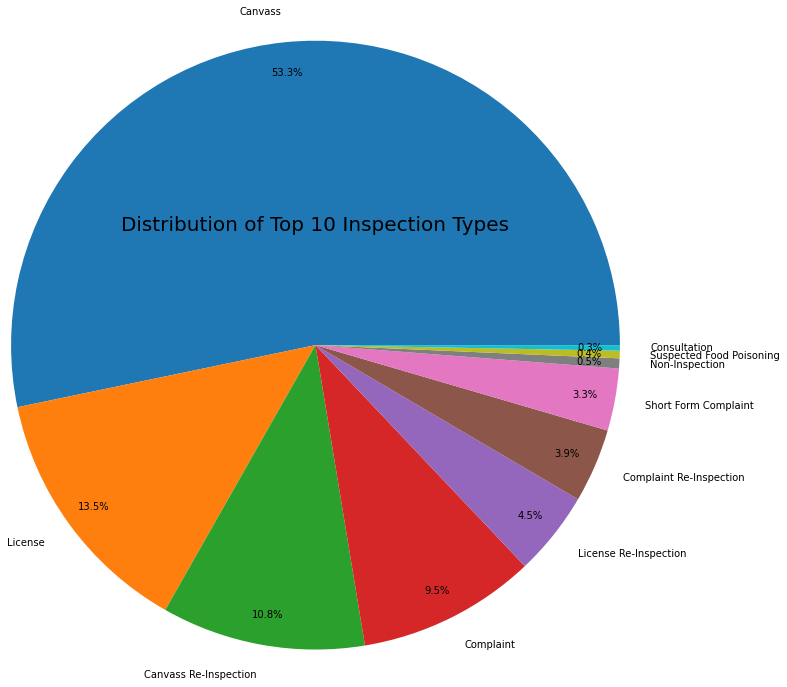

In [15]:
#top 10 Inspection types and its piechart
plt.pie(df['Inspection Type'].value_counts()[:10],labels = list(df['Inspection Type'].value_counts()[:10].index), radius = 3.5,autopct='%1.1f%%',
          pctdistance=0.9, startangle=0)
plt.title('Distribution of Top 10 Inspection Types', fontdict={'fontsize': 20})
plt.show()

#### Above 50per of the Inspection type is Canvass.

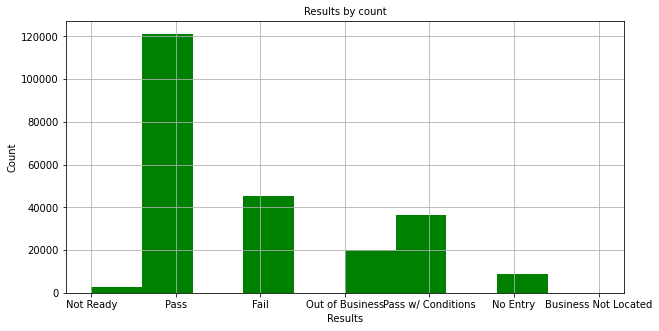

In [16]:
plt.figure(figsize = (10,5))
df['Results'].hist(color= 'g')
plt.title('Results by count', fontdict={'fontsize': 10})
plt.xlabel('Results',fontdict={'fontsize': 10})
plt.ylabel('Count',fontdict={'fontsize': 10})
plt.show()

#### Most of the values comes under Pass, Fail and Pass w/Conditions. Remaining values need to be removed.  Visualization of the minor values is also difficult.

In [17]:
# Removing the remaining values other than Pass, Fail and Pass w/Conditions in Results column
df = df[~df.Results.isin(["Out of Business", "Business Not Located", "No Entry", "Not Ready"])]

In [18]:
# Top 20 companies with respect to count
df['Trade Name'].value_counts()[:10]

SUBWAY                          2947
DUNKIN DONUTS                   1618
MCDONALD'S                       619
7-ELEVEN                         448
CHIPOTLE MEXICAN GRILL           365
MCDONALDS                        340
POTBELLY SANDWICH WORKS LLC      319
POTBELLY SANDWICH WORKS          284
DUNKIN DONUTS/BASKIN ROBBINS     273
CORNER BAKERY CAFE               267
Name: Trade Name, dtype: int64

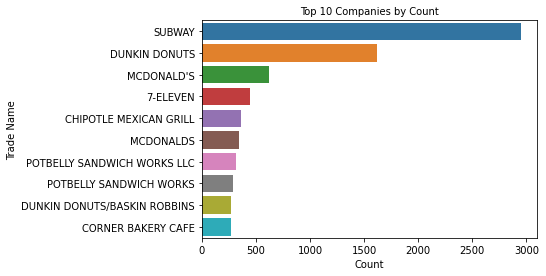

In [19]:
# Plot of the companies and their count is
sns.barplot(x=df['Trade Name'].value_counts()[:10],y=df['Trade Name'].value_counts()[:10].index)
plt.title('Top 10 Companies by Count', fontdict={'fontsize': 10})
plt.xlabel('Count',fontdict={'fontsize': 10})
plt.ylabel('Trade Name',fontdict={'fontsize': 10})
plt.show()

#### Top Company is Subway based on count followed by Dunkin Donuts and McDonald's

In [20]:
# top 10 Facility Types based on count
df['Facility Type'].value_counts()[:10]

Restaurant                         136511
Grocery Store                       26247
School                              14173
Children's Services Facility         4092
Bakery                               2970
Daycare Above and Under 2 Years      2807
Daycare (2 - 6 Years)                2595
Long Term Care                       1511
Catering                             1164
Liquor                                895
Name: Facility Type, dtype: int64

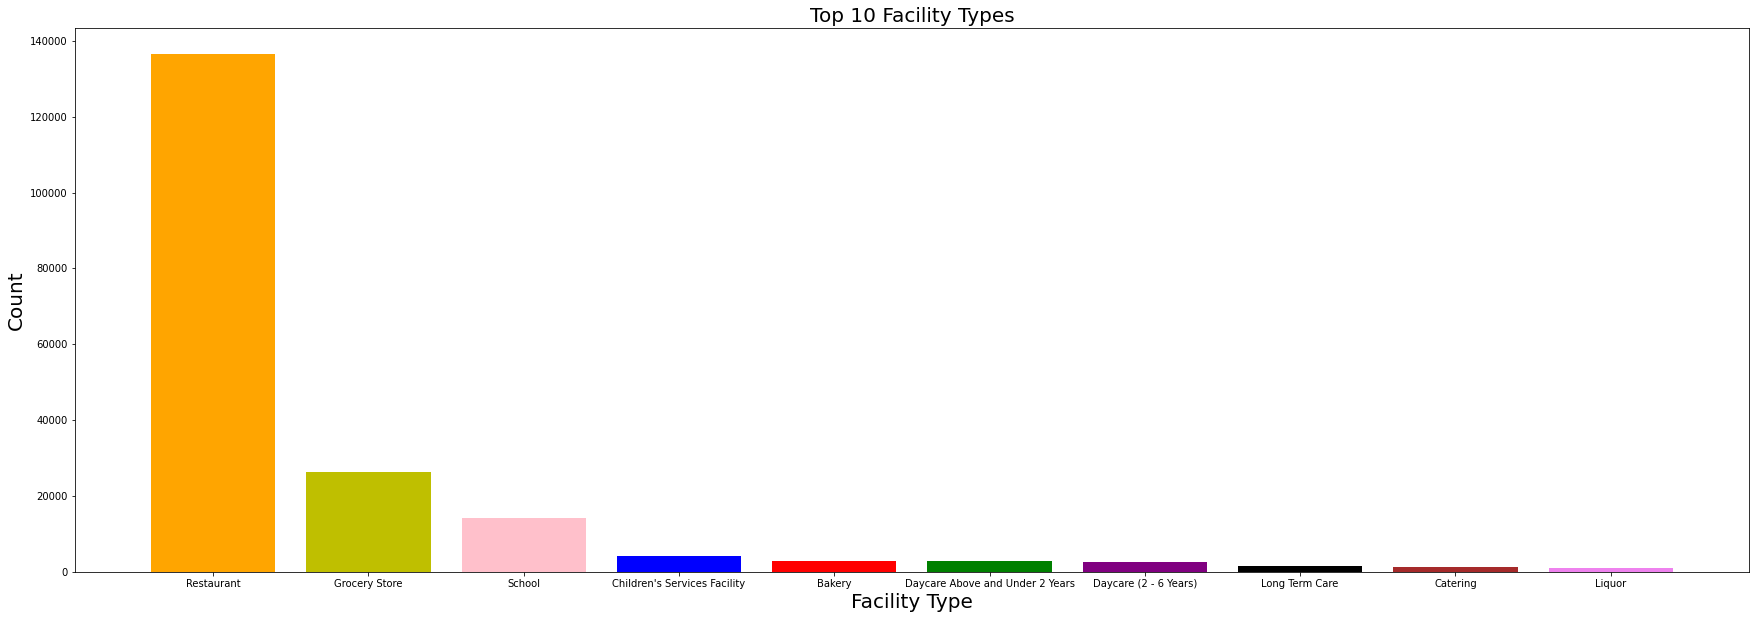

In [21]:
# Visiualizing the top 10 facility types and their count.
x = df['Facility Type'].value_counts().index.values.astype('str')[:10]
y = df['Facility Type'].value_counts().values[:10]
plt.figure(figsize = (30,10))
plt.bar(x,y,color= ('orange','y','pink','b','r','g','purple','black','brown','violet'))
plt.title('Top 10 Facility Types', fontdict={'fontsize': 20})
plt.xlabel('Facility Type',fontdict={'fontsize': 20})
plt.ylabel('Count',fontdict={'fontsize': 20})
plt.show()

#### Most of the Companies are Restaurants followed by Grocery Stores and Schools.

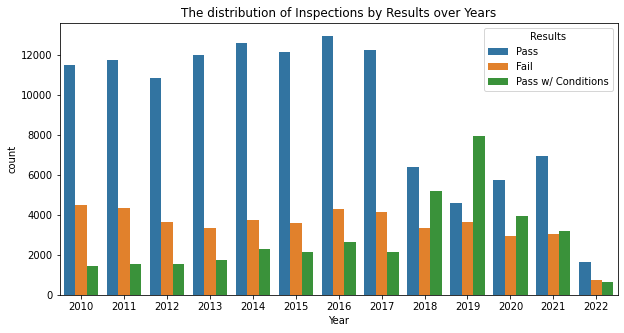

In [22]:
# Yearly Results
plt.figure(figsize=(10,5))
fig=sns.countplot(x="Year", data=df ,hue='Results')
fig.set_title("The distribution of Inspections by Results over Years")
plt.show()

#### From 2010 to 2017, the pass count is far more than the fail count in that particular year. Later the difference got reduced.

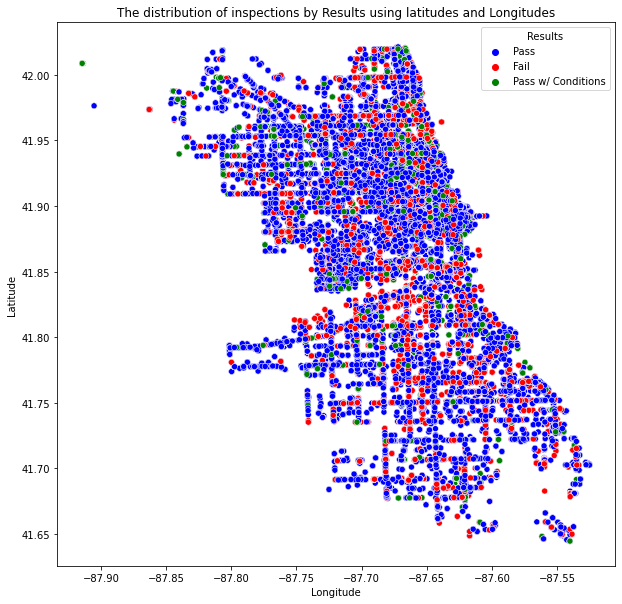

In [23]:
# Visualization of the companies results based on latitude and longitude
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x='Longitude', y='Latitude', hue='Results' , data=df, ax=ax, palette = ["blue","red","green"])
ax.set_title("The distribution of inspections by Results using latitudes and Longitudes")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

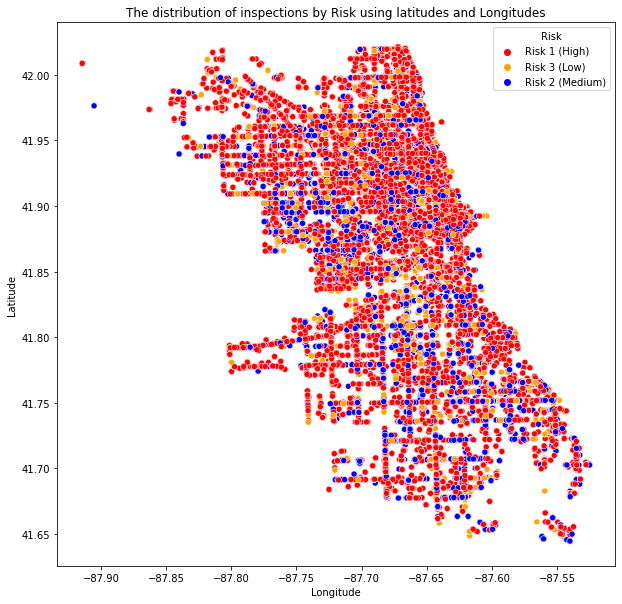

In [24]:
# Visualization of the companies risks based on latitude and longitude
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x='Longitude', y='Latitude', hue='Risk' , data=df, ax=ax, palette = ['red','orange','blue'])
ax.set_title("The distribution of inspections by Risk using latitudes and Longitudes")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

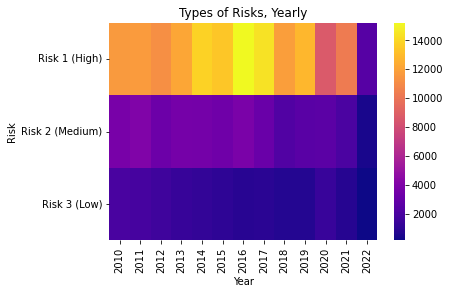

In [25]:
#Risk Yearly 
Risk_Year = df.pivot_table(index='Risk', columns='Year', aggfunc='size', fill_value=0)
sns.heatmap(Risk_Year, cmap ='plasma')
plt.title('Types of Risks, Yearly')
plt.show()

#### Comparitively, Risk 1 (High) is more in 2016.

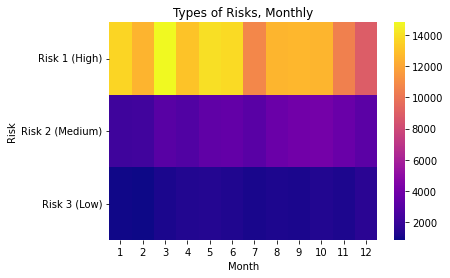

In [26]:
#Risk Monthly
Risk_Month = df.pivot_table(index='Risk', columns='Month', aggfunc='size', fill_value=0)
sns.heatmap(Risk_Month, cmap ='plasma')
plt.title('Types of Risks, Monthly')
plt.show()

#### Comparitively, Risk 1 (High) count is more in March(3).

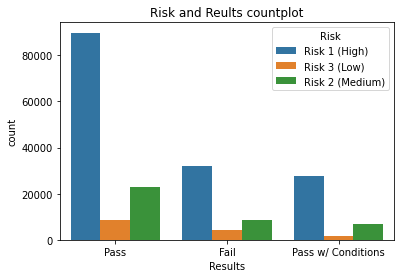

In [27]:
sns.countplot(x='Results', data=df ,hue='Risk')
plt.title('Risk and Reults countplot')
plt.show()

#### Here, the highest count is for (Pass, Risk 1(High)). 
#### (or) Here, High Risk Type has Highest Pass Results.

# Feature Selection and Model Evaluation

In [28]:
df.dtypes

Inspection ID        int64
Trade Name          object
License            float64
Facility Type       object
Risk                object
Address             object
Zipcode            float64
Inspection Date     object
Inspection Type     object
Results             object
Violations          object
Latitude           float64
Longitude          float64
Location            object
Year                 int64
Month                int64
Day                  int64
dtype: object

In [29]:
# using risk as feature column
from sklearn.model_selection import train_test_split
X = df[['Risk']]
y = df['Results']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(f'Training examples: {X_train.shape[0]}')
print(f'Test examples: {X_test.shape[0]}')
print('\nFeature names:')
print(*X.columns, sep='\t')

Training examples: 162134
Test examples: 40534

Feature names:
Risk


In [30]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
categorical_features = X.select_dtypes(include="object").columns
numerical_features = X.select_dtypes(exclude="object").columns
num_pipe = Pipeline([('impute_missing', SimpleImputer(missing_values = np.nan,strategy='mean')),
                           ('standardize_num', StandardScaler())
                        ])

cat_pipe = Pipeline([('impute_missing', SimpleImputer(missing_values = np.nan ,strategy='most_frequent')),
                          ('create_dummies', OneHotEncoder())])

processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipe, numerical_features),
                                                      ('create_dummies', cat_pipe, categorical_features)
                                                     ])

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [32]:
cat_pipe.fit(X_train,y_train)

Pipeline(steps=[('impute_missing', SimpleImputer(strategy='most_frequent')),
                ('create_dummies', OneHotEncoder())])

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import UndefinedMetricWarning
import warnings
warnings.simplefilter("ignore", UndefinedMetricWarning)
modeling_pipeline = Pipeline([
        ('data_processing', processing_pipeline),
        ('logreg', LogisticRegression(penalty='none', max_iter = 50))]
    )

modeling_pipeline.fit(X_train, y_train)

#test
y_testpredict = modeling_pipeline.predict(X_test)
    
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print("Testing Scores:\n")
print(classification_report(y_test, y_testpredict))

#train
y_trainpredict = modeling_pipeline.predict(X_train)

print("Training Scores:\n")
print(classification_report(y_train, y_trainpredict))

Testing Scores:

                    precision    recall  f1-score   support

              Fail       0.00      0.00      0.00      8970
              Pass       0.60      1.00      0.75     24243
Pass w/ Conditions       0.00      0.00      0.00      7321

          accuracy                           0.60     40534
         macro avg       0.20      0.33      0.25     40534
      weighted avg       0.36      0.60      0.45     40534

Training Scores:

                    precision    recall  f1-score   support

              Fail       0.00      0.00      0.00     36265
              Pass       0.60      1.00      0.75     96864
Pass w/ Conditions       0.00      0.00      0.00     29005

          accuracy                           0.60    162134
         macro avg       0.20      0.33      0.25    162134
      weighted avg       0.36      0.60      0.45    162134



#### After modelling with 'Risk' as feature column, it is clear that we can't predict using it. Because there is very less chances to predict 'Fail' values and the model is having less accuracy.

#### Another column that can be a feature column is 'Violations'.

In [ ]:
# converting the violations to numerical.
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
def split_violations(violations):
    new_df_row = pd.Series([])
    if type(violations) == str:
        violations = violations.split(' | ')
        for violation in violations:
            index = "v_" + violation.split('.')[0]
            new_df_row[index] = 1
    return new_df_row

# Calculate violation values and set missing violations to 0
new_df_data = df.Violations.apply(split_violations).fillna(0)

# Generate column names
critical_columns = [("v_" + str(num)) for num in range(1, 15)]
serious_columns = [("v_" + str(num)) for num in range(15, 30)]
minor_columns = [("v_" + str(num)) for num in range(30, 45)]
minor_columns.append("v_45")

# Create complete list of column names
columns = critical_columns + serious_columns + minor_columns

# Create dataframe using column names, violation data and inspection ID
new_df = pd.DataFrame(new_df_data, columns=columns)
new_df['Inspection ID'] = df['Inspection ID']
new_df['Results'] = df['Results']

In [ ]:
print(new_df.shape)
new_df.head()

In [ ]:
# Finding the counts for each type. 
counts = pd.DataFrame({
    "critical_count": new_df[critical_columns].sum(axis=1),
    "serious_count": new_df[serious_columns].sum(axis=1),
    "minor_count": new_df[minor_columns].sum(axis=1)
})

counts['Inspection ID'] = df['Inspection ID']

In [ ]:
# creating new dataframe for violations.
titles = pd.DataFrame({
    "v_1": "Approved food sources (1)",
    "v_2": "Hot/cold storage facilities (2)",
    "v_3": "Hot/cold storage temp. (3)",
    "v_4": "Contaminant protection (4)",
    "v_5": "No sick handlers (5)",
    "v_6": "Proper hand washing (6)",
    "v_7": "Proper utensil washing (7)",
    "v_8": "Proper sanitizing solution (8)",
    "v_9": "Hot/cold water supply (9)",
    "v_10": "Waste water disposal (10)",
    "v_11": "Adequate toilet facilities (11)",
    "v_12": "Adequate hand washing facilities (12)",
    "v_13": "Control of rodents, other pests (13)",
    "v_14": "Correct serious violations (14)",
    "v_15": "No re-served food (15)",
    "v_16": "Protection from contamination (16)",
    "v_17": "Proper thawing (17)",
    "v_18": "Pest control, associated areas (18)",
    "v_19": "Proper garbage area (19)",
    "v_20": "Proper garbage storage (20)",
    "v_21": "Oversight of hazardous food (21)",
    "v_22": "Dishwasher maintenance (22)",
    "v_23": "Scrape before washing (23)",
    "v_24": "Proper dishwashers (24)",
    "v_25": "Minimize toxic materials (25)",
    "v_26": "Adequate customer toilets (26)",
    "v_27": "Supplied toilet facilities (27)",
    "v_28": "Visible inspection report (28)",
    "v_29": "Correct minor violations (29)",
    "v_30": "Labelled containers (30)",
    "v_31": "Sterile utensils (31)",
    "v_32": "Clean, maintain equipment (32)",
    "v_33": "Clean, sanitize utensils (33)",
    "v_34": "Clean, maintain floor (34)",
    "v_35": "Maintain walls & ceiling (35)",
    "v_36": "Proper lighting (36)",
    "v_37": "Toilet rooms vented (37)",
    "v_38": "Proper venting, plumbing (38)",
    "v_39": "Linen, clothing storage (39)",
    "v_40": "Proper thermometers (40)",
    "v_41": "Clean facilities, store supplies (41)",
    "v_42": "Ice handling, hairnets, clothes (42)",
    "v_43": "Ice equipment storage (43)",
    "v_44": "Restrict prep area traffic (44)",
    "v_45": "Restrict smoking (45)"
}, index=[0])

In [ ]:
new_df.columns

In [ ]:
X=new_df.drop("Results",axis=1)
y=new_df["Results"]

In [ ]:
#Spit into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

In [ ]:
#Logistic Regression and DecisionTreeClassifier models
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

pipe1 = Pipeline([('logreg', clf1)])
pipe2 = Pipeline([('decisiontree', clf2)])

labs = ['Logistic Regression', 'Decision Tree']
clfs = [pipe1, pipe2]
clfs = zip(labs, clfs)

alg = []
accuracy = []
for lab, clf in clfs:
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring='accuracy')
    print(f'Accuracy {scores.mean():.2f} [{lab}]')
    alg.append(lab)
    accuracy.append(scores.mean())

In [ ]:
#Hyper-parameters tuning for the above models
from sklearn.model_selection import ShuffleSplit
def find_best_model(X, y):
    
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': { 'C': [0.01,0.1,1,10,100], 'penalty' : ['l2']}},
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {'criterion': ['gini', 'entropy'],'max_depth': [5,10] }

        }
    }
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
             'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(X_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf3 = RandomForestClassifier()
pipe3 = Pipeline([('randomforest', clf3)])
lab = ['RandomForest']
scores = cross_val_score(estimator=clf3, X=X_train, y=y_train, cv=10, scoring='accuracy')
print(f'Accuracy {scores.mean():.2f} [{lab}]')

In [ ]:
#hyper-parameter tuning for Random Forest Classifier
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=20, random_state=0), X_train, y_train, cv=10)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

In [ ]:
# Confusion matrix for test data
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
g_results = RandomForestClassifier(n_estimators=20, random_state=0)
g_results = g_results.fit(X_train, y_train) #fitting is done
y_testp = g_results.predict(X_test)
cm_test = confusion_matrix(y_test, y_testp)
print("Confusion matrix for test data is\n", cm_test)

In [ ]:
#Confusion matrix for train data
y_train_pred = g_results.predict(X_train)
cm_train = confusion_matrix(y_train, y_train_pred)
print("Confusion matrix for train data is\n", cm_train)

In [ ]:
#Classification report for test data and using GridSearchCV
from sklearn.model_selection import GridSearchCV
param = {'n_estimators': [10,15,20,50,100,200]}
g_results = GridSearchCV(estimator= RandomForestClassifier(n_estimators=20, random_state=0), 
                           param_grid = param, scoring='accuracy', refit=True)
g_results = g_results.fit(X_train, y_train)
g_score = g_results.score(X_test, y_test)
y_testp = g_results.predict(X_test)
y_testpr = g_results.predict_proba(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_testp))

In [ ]:
#Classification report for train data and using GridSearchCV
y_trainp = g_results.predict(X_train)
y_trainpr = g_results.predict_proba(X_train)
from sklearn.metrics import classification_report
print(classification_report(y_train, y_trainp))

In [ ]:
# one-vs-one for Random Forest Classifier after hyper-parameter tuning
from sklearn.metrics import roc_auc_score
macro_roc_auc_ovo = roc_auc_score(y_test, y_testpr, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_testpr, multi_class="ovo", average="weighted"
)
print(
    "One-vs-One ROC AUC scores:\n{:.2f} (macro),\n{:.2f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo))

In [ ]:
# one-vs-rest for Random Forest Classifier after hyper-parameter tuning
macro_roc_auc_ovr = roc_auc_score(y_test, y_testpr, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(
    y_test, y_testpr, multi_class="ovr", average="weighted"
)
print("One-vs-Rest ROC AUC scores:\n{:.2f} (macro),\n{:.2f} "
      "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
)

# Findings
>1. ‘Violations’ is the feature column.
>2.  Using this data after hyper parameters tuning, the Random forest classifier has the highest accuracy of 87%, followed by a decision tree classifier of 86% and logistic regression of 60%.
>3.  Test score prediction score is 87% and train score prediction is 99%.
>4.  After one vs one and one vs rest, the accuracy or AUC ROC is 94% and 95% respectively for weighted by prevalence.

# Conclusion
>1.  Using the final model (one vs rest, weighted by the prevalence (in this case)), inspectors can easily predict that there will be a decrease in the chances of visiting each location for inspection. 
>2. Even the owners of the restaurants or the food stores can predict the result and can take safety measures to avoid failing in the inspection. 
>3. Therefore, this model helps in the detection of inspection results and improves the quality of food.

# References
>1. https://github.com/appliedecon/data602-lectures 
>2. https://data.cityofchicago.org/api/assets/BAD5301B-681A-4202-9D25-51B2CAE672FF
>3. https://data.cityofchicago.org/Health-Human-Services/Food-Inspections/4ijn-s7e5/data
>4. https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
>5. https://www.kaggle.com/code/hamditarek/food-inspections-in-chicago-eda-and-modeling/notebook 
>6. https://michael-fuchs-python.netlify.app/2019/11/13/ovo-and-ovr-classifier/ 
>7. https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea 
>8. https://code-examples.net/en/q/1f19f54 
>9. https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py 